# ZADANIE 1 (14.10.2024)
Korzystając z korpusu mów inauguracyjnych, policzyć iloczyn skalarny i podobieństwo kosinusowe dla tekstów ze słowami funkcyjnymi i bez nich i przedstawić wyniki w formie mapy ciepła (czyli są to 4 mapy ciepła).

In [12]:
from nltk.corpus import inaugural

corpus = [inaugural.raw(doc) for doc in inaugural.fileids()]

In [13]:
# from nltk.corpus import stopwords

# stopwords_en = set(stopwords.words('english'))
# corpus_wos = [' '.join([word for word in doc.split() if word.lower() not in stopwords_en]) for doc in corpus]
# print('the' in stopwords_en)

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vec_w_stop = CountVectorizer(token_pattern=r"(?u)\b[a-zA-Z]+\b", stop_words='english')
vec_wo_stop = CountVectorizer(token_pattern=r"(?u)\b[a-zA-Z]+\b")
words_w_stop = vec_w_stop.fit_transform(corpus)
words_wo_stop = vec_wo_stop.fit_transform(corpus)

df_words_w_stop = pd.DataFrame(words_w_stop.T.toarray(), vec_w_stop.get_feature_names_out(), columns=inaugural.fileids())
df_words_wo_stop = pd.DataFrame(words_wo_stop.T.toarray(), vec_wo_stop.get_feature_names_out(), columns=inaugural.fileids())
display(df_words_w_stop.head())
display(df_words_wo_stop.head())

,1789-Washington.txt,1793-Washington.txt,1797-Adams.txt,1801-Jefferson.txt,1805-Jefferson.txt,1809-Madison.txt,1813-Madison.txt,1817-Monroe.txt,1821-Monroe.txt,1825-Adams.txt,...,1985-Reagan.txt,1989-Bush.txt,1993-Clinton.txt,1997-Clinton.txt,2001-Bush.txt,2005-Bush.txt,2009-Obama.txt,2013-Obama.txt,2017-Trump.txt,2021-Biden.txt
abandon,0,0,0,1,0,0,0,0,2,0,...,0,0,0,0,0,2,0,0,0,0
abandoned,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
abandonment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
abate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abdicated,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,1789-Washington.txt,1793-Washington.txt,1797-Adams.txt,1801-Jefferson.txt,1805-Jefferson.txt,1809-Madison.txt,1813-Madison.txt,1817-Monroe.txt,1821-Monroe.txt,1825-Adams.txt,...,1985-Reagan.txt,1989-Bush.txt,1993-Clinton.txt,1997-Clinton.txt,2001-Bush.txt,2005-Bush.txt,2009-Obama.txt,2013-Obama.txt,2017-Trump.txt,2021-Biden.txt
a,14,0,51,21,20,19,25,61,76,28,...,59,73,17,59,46,26,47,37,15,49
abandon,0,0,0,1,0,0,0,0,2,0,...,0,0,0,0,0,2,0,0,0,0
abandoned,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
abandonment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
abate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 7

In [16]:
# euclidean with stopwords
euc_w_stop = np.array(df_words_w_stop.T @ df_words_w_stop)
np.fill_diagonal(euc_w_stop, 0)

# euclidean without stopwords
euc_wo_stop = np.array(df_words_wo_stop.T @ df_words_wo_stop)
np.fill_diagonal(euc_wo_stop, 0)

# normalize vectors
norm_w_stop = np.linalg.norm(df_words_w_stop.T, axis=1, keepdims=True).T
norm_wo_stop = np.linalg.norm(df_words_wo_stop.T, axis=1, keepdims=True).T
df_words_w_stop /= norm_w_stop
df_words_wo_stop /= norm_wo_stop

# cosine with stopwords
cosine_w_stop = np.array(df_words_w_stop.T @ df_words_w_stop)
np.fill_diagonal(cosine_w_stop, 0)

# euclidean without stopwords
cosine_wo_stop = np.array(df_words_wo_stop.T @ df_words_wo_stop)
np.fill_diagonal(cosine_wo_stop, 0)

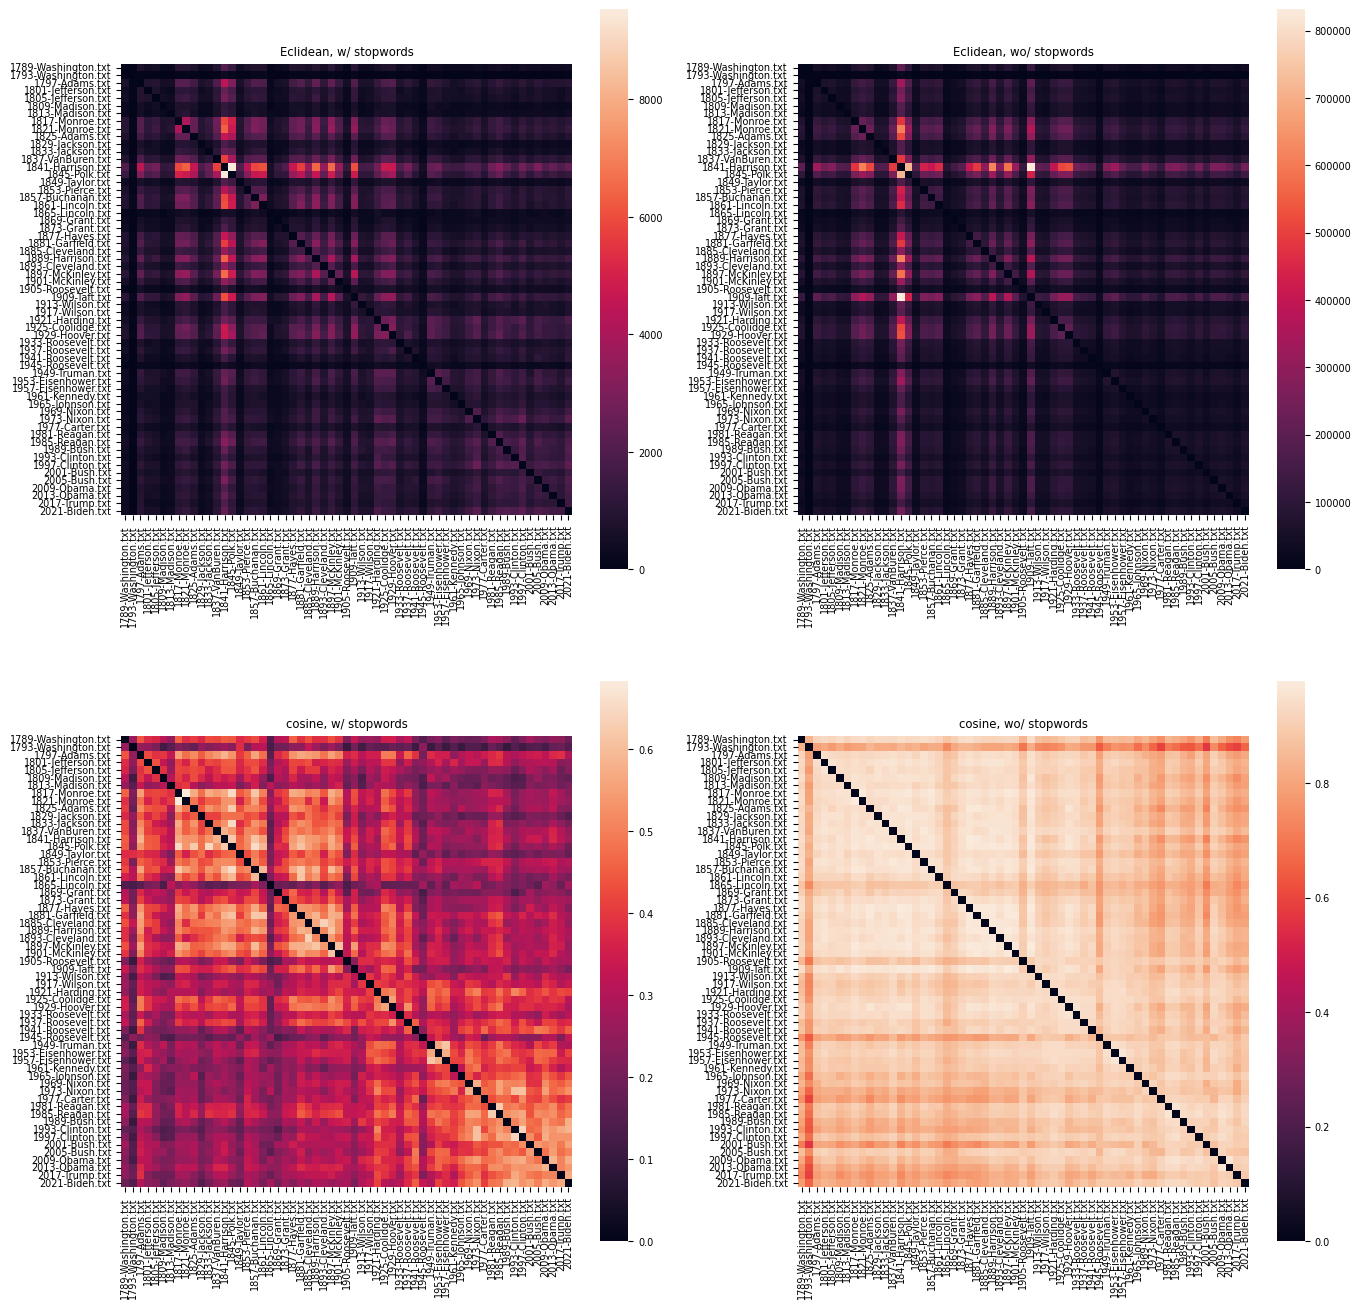

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))
for a in ax.flatten():
    a.set_aspect('equal')

sns.heatmap(euc_w_stop, xticklabels=inaugural.fileids(), yticklabels=inaugural.fileids(), ax=ax[0, 0])
ax[0, 0].set_title("Eclidean, w/ stopwords")

sns.heatmap(euc_wo_stop, xticklabels=inaugural.fileids(), yticklabels=inaugural.fileids(), ax=ax[0, 1])
ax[0, 1].set_title("Eclidean, wo/ stopwords")

sns.heatmap(cosine_w_stop, xticklabels=inaugural.fileids(), yticklabels=inaugural.fileids(), ax=ax[1, 0])
ax[1, 0].set_title("cosine, w/ stopwords")

sns.heatmap(cosine_wo_stop, xticklabels=inaugural.fileids(), yticklabels=inaugural.fileids(), ax=ax[1, 1])
ax[1, 1].set_title("cosine, wo/ stopwords")

plt.show()